# LOADING REQUIRED LIABRARIES

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import KernelPCA
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

# LOADING AND CREATING THE DATAFRAME

In [23]:
df = pd.read_csv('Data/whisky.csv')
df.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


# EDA

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15  Latitude    86 non-null     int64 
 16  Longitude   86 non-null     int64 
dtypes: int64(15), object(2)
memory usage: 11.5+ KB


In [25]:
df.describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,43.500000,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05
std,24.969982,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05
25%,22.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05
50%,43.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05
75%,64.750000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05
max,86.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06


In [26]:
df.isnull().sum().sum()

0

In [27]:
df = df.drop(["RowID", "Body", "Distillery", "Postcode", "Longitude", "Latitude"], axis = 1)
df.head()

,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,0,0,2,1,2,2,2,2,2
1,3,1,0,0,4,3,2,2,3,3,2
2,3,2,0,0,2,0,0,2,2,3,2
3,1,4,4,0,0,2,0,1,2,1,0
4,2,2,0,0,1,1,1,2,3,1,1


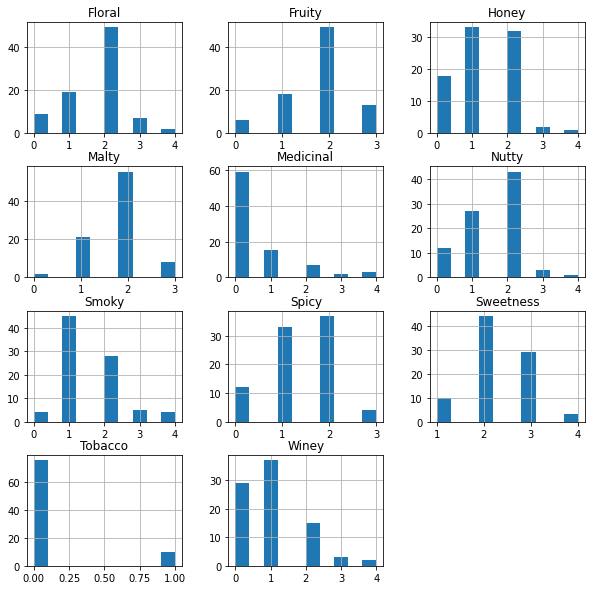

In [28]:
df.hist(figsize=(10,10))
plt.show()

# Dimension reduction

In [29]:
np.random.seed(42)
rbf_pca= KernelPCA(n_components=2, kernel='rbf')
X_reduced= rbf_pca.fit_transform(df)

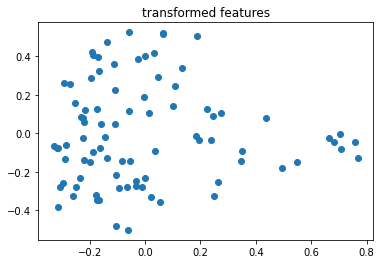

In [30]:
x = X_reduced[:,0]
y = X_reduced[:,1]

plt.scatter(x, y)
plt.title('transformed features')
plt.show()

In [31]:
correlation = df.corr()

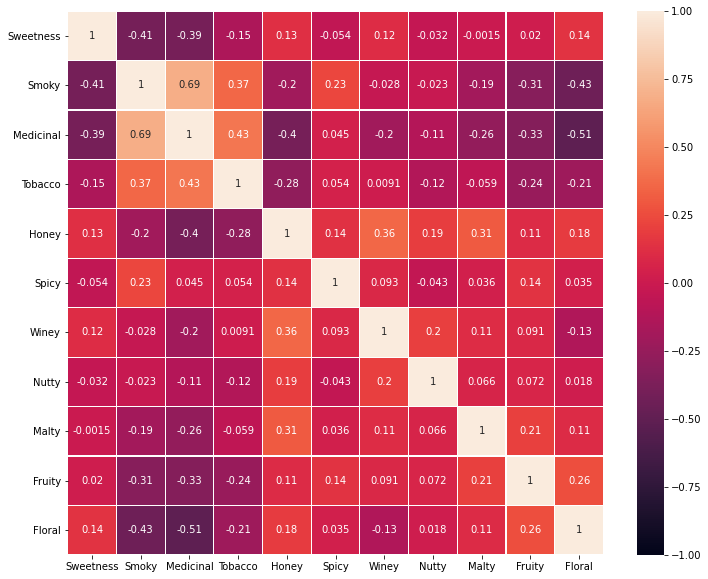

In [32]:
# correlation heatmap
plt.subplots(figsize = (12,10))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, linewidth=0.1)

# Clustering

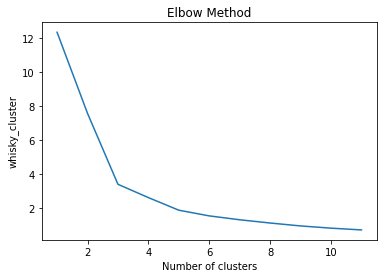

In [33]:
whisky_cluster = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced)
    whisky_cluster.append(kmeans.inertia_)

plt.plot(range(1, 12), whisky_cluster)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('whisky_cluster')
plt.show()

- If the line graph resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.
- From the above visualisation 3 is the optimal number of clusters when using the elbow method.

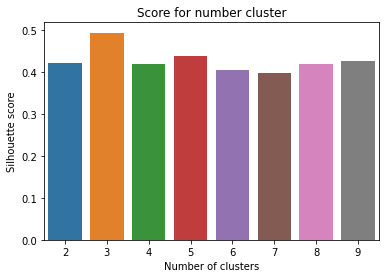

In [34]:
sil_scores = []
for clusters in range(2,10):
    km = KMeans(n_clusters=clusters, random_state=42)
    km.fit(X_reduced)
    labels =  km.predict(X_reduced)
    
    #silhouette score
    sil_score = silhouette_score(X_reduced, labels)   
    sil_scores.append(sil_score)
    
sns.barplot(x=list(range(2,10)), y=sil_scores)
plt.title('Score for number cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

- It is evident that 3 clusters are more likely to give us a better results as we see 3 clusters rank the highest. 

# Model

In [35]:
km= KMeans(n_clusters=3, random_state=42)
y_preds= km.fit_predict(X_reduced)

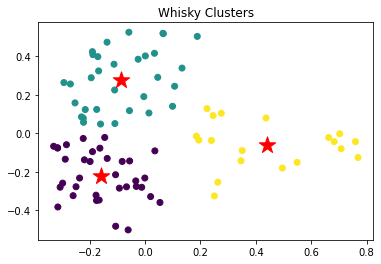

In [36]:
plt.scatter(x, y, c=y_preds, cmap='viridis' )
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='*')
plt.title('Whisky Clusters')
plt.show()

 - The scatterplot above indicates that various clusters of whisky distillers are separable by their tasting profiles.

In [38]:
#Classification report
print("Classification report for Whiskey distillery:\n",classification_report(y_preds, kmeans.labels_))

Classification report for Whiskey distillery:
               precision    recall  f1-score   support

           0       0.11      0.03      0.05        35
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

    accuracy                           0.01        86
   macro avg       0.01      0.00      0.00        86
weighted avg       0.05      0.01      0.02        86



/home/recruits/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- After clustering the tasting flavours into 3 clusters, the level of flavors that make each cluster to be distinct are Sweetness,Fruity and Floral.The remaining flavors are not so dominant and are almost equal across the clusters.


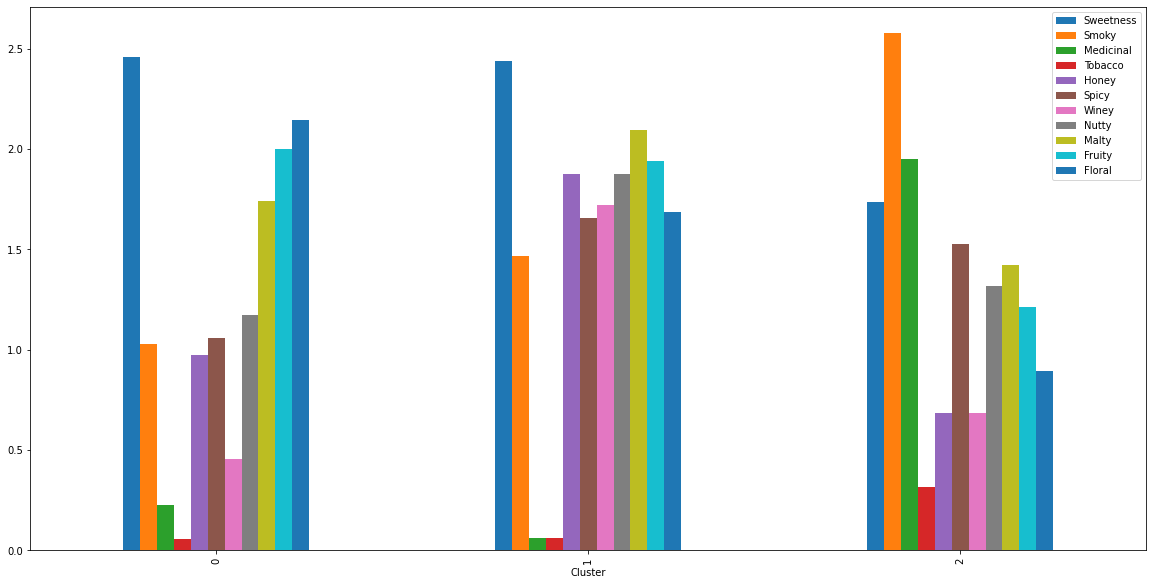

In [40]:
cluster = pd.DataFrame(y_preds,columns = ['Cluster'])
df_cluster = pd.concat([df,cluster],axis = 1)

df_clusters = pd.concat([df,cluster],axis = 1)
df_clusters = df_clusters.dropna()

df_clusters = pd.concat([df,cluster],axis = 1)
df_clusters = df_clusters.dropna()

features_grouped_by_clusters = df_clusters.groupby('Cluster').mean()
features_grouped_by_clusters.plot.bar(figsize=(20,10));

- cluster_1 -Sweetness and Malty, Fruity
- cluster_2 - More Smoky,Medicinal and Floral
- cluster_0 - More Sweetness, Floral and Fruity

# Conclusion

 The model proved to be a great unsupervised machine learning tool as it was able to cluster the whiskey distilliers by their tasting profile